# Title: Data Visualization for FreeCodeCamp Forum Page Views

# 1. Import Libraries
## Importing the necessary libraries for data analysis and visualization.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

# 2. Load and Clean Data
## Importing the dataset and cleaning the data by removing outliers.

In [2]:
# Import data (Make sure to parse dates and set the 'date' column as index)
df = pd.read_csv('fcc-forum-pageviews.csv', index_col="date")

# Convert 'date' index to datetime
df.index = pd.to_datetime(df.index)

# Sort the values by 'value' column and remove the top and bottom 2.5% of data to remove outliers
df = df.sort_values("value")
df = df[round(2.5 * df.shape[0] / 100):round(-2.5 * df.shape[0] / 100)]

# Re-sort the dataframe by the index after cleaning
df = df.sort_index()

# 3. Line Plot
## This plot shows the daily page views on the FreeCodeCamp forum over time.

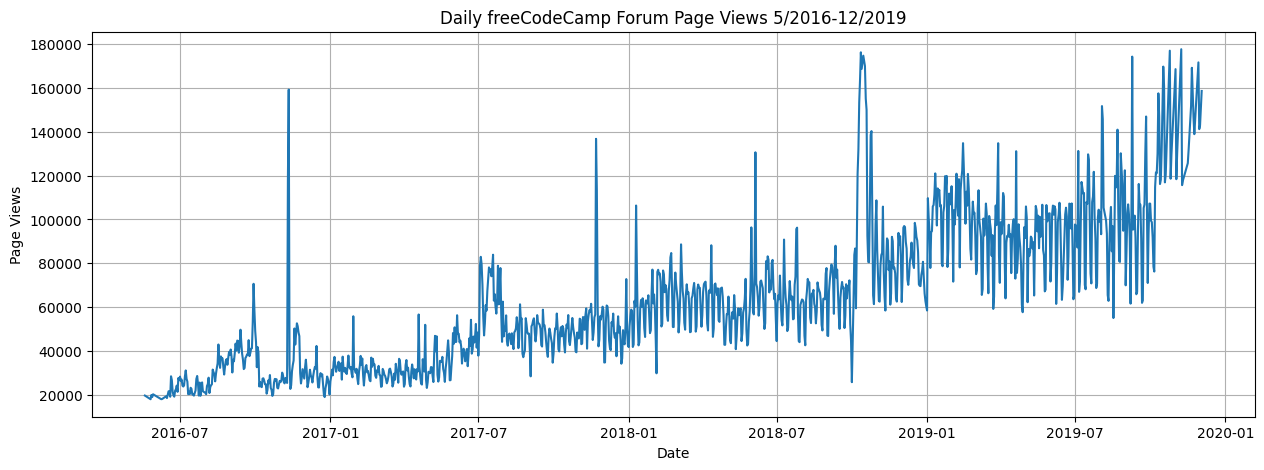

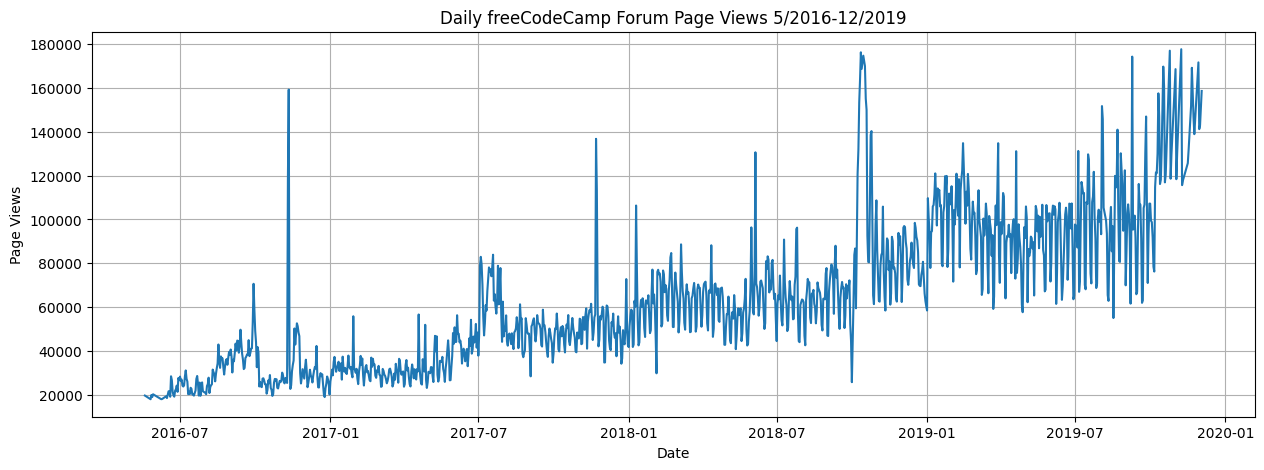

In [3]:
def draw_line_plot():
    # Draw line plot
    fig = plt.figure(figsize=(15, 5))
    plt.plot(df.index, df['value'], color='tab:blue')
    plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")
    plt.xlabel("Date")
    plt.ylabel("Page Views")
    plt.grid(True)

    # Save image and return fig (don't change this part)
    fig.savefig('line_plot.png')
    return fig

# Call the function to display the plot
draw_line_plot()

# 4. Bar Plot
## This plot visualizes the average monthly page views grouped by year.

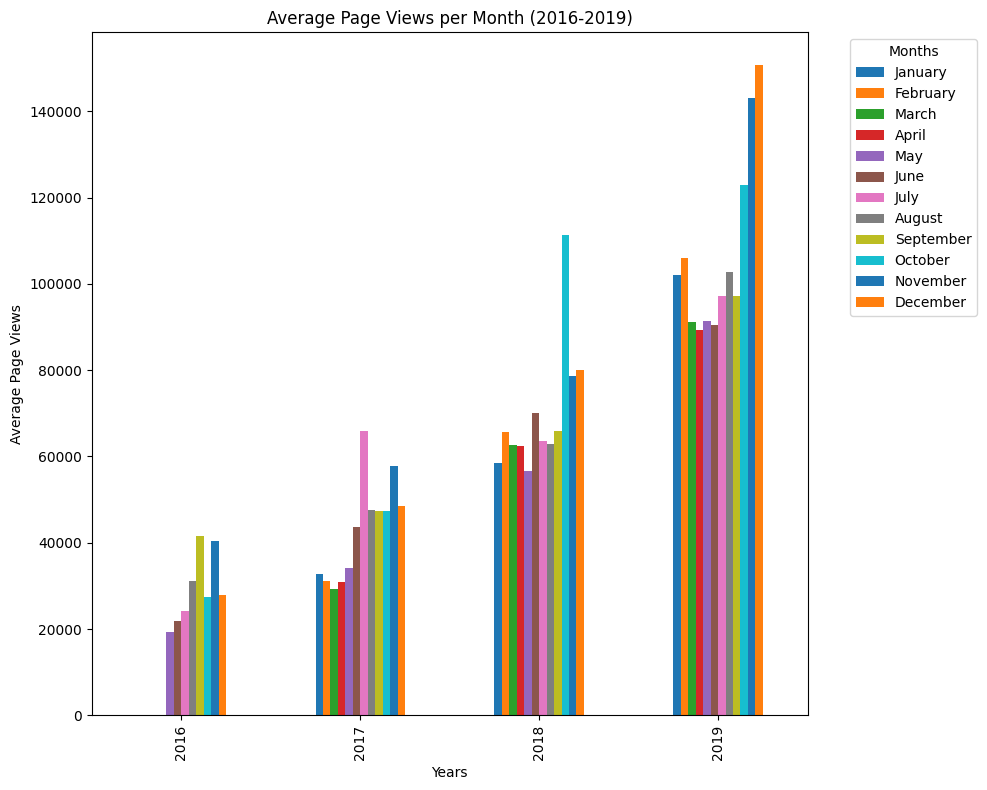

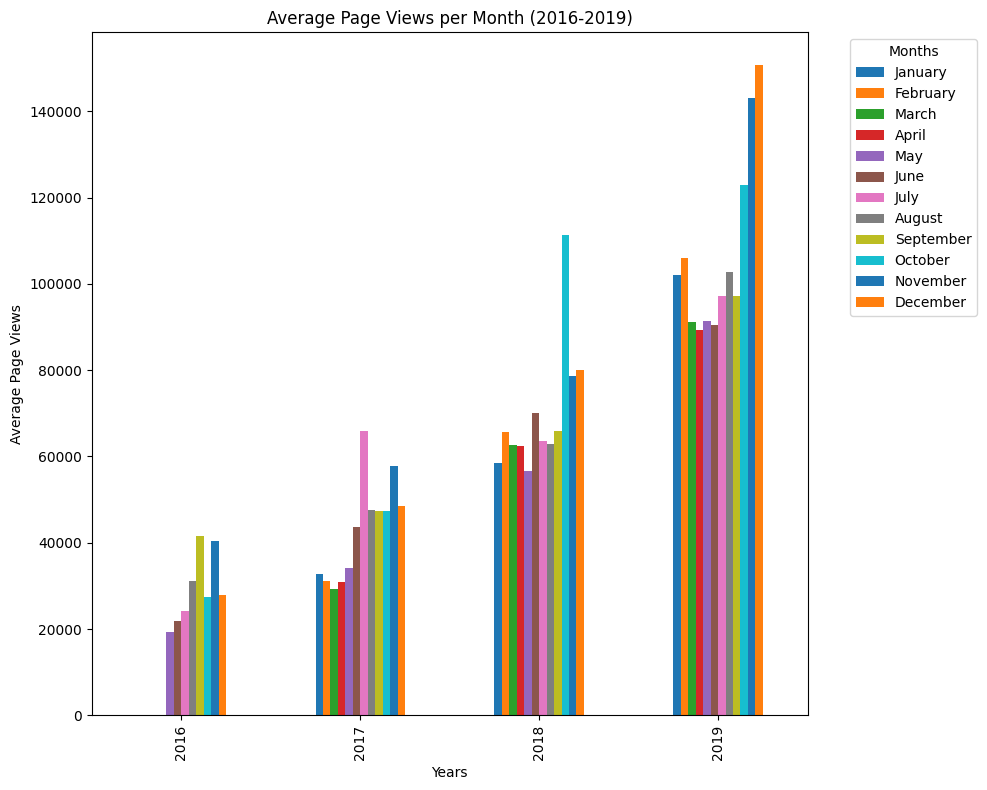

In [4]:

def draw_bar_plot():
    # Copy and modify data for monthly bar plot
    df_bar = df.copy()
    df_bar['Year'] = df.index.year
    df_bar['Month'] = df.index.month

    # Calculate the monthly average page views
    monthly_avg = df_bar.groupby(['Year', 'Month'])['value'].mean().unstack()

    # Draw bar plot
    fig, ax = plt.subplots(figsize=(10, 8))
    monthly_avg.plot(kind='bar', ax=ax)
    ax.set_title('Average Page Views per Month (2016-2019)')
    ax.set_xlabel('Years')
    ax.set_ylabel('Average Page Views')
    months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
    ax.legend(months, title='Months', bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.tight_layout()

    # Save image and return fig (don't change this part)
    fig.savefig('bar_plot.png')  
    return fig

# Call the function to display the plot
draw_bar_plot()

# 5. Box Plots
## These plots show the distribution of page views by year and by month.

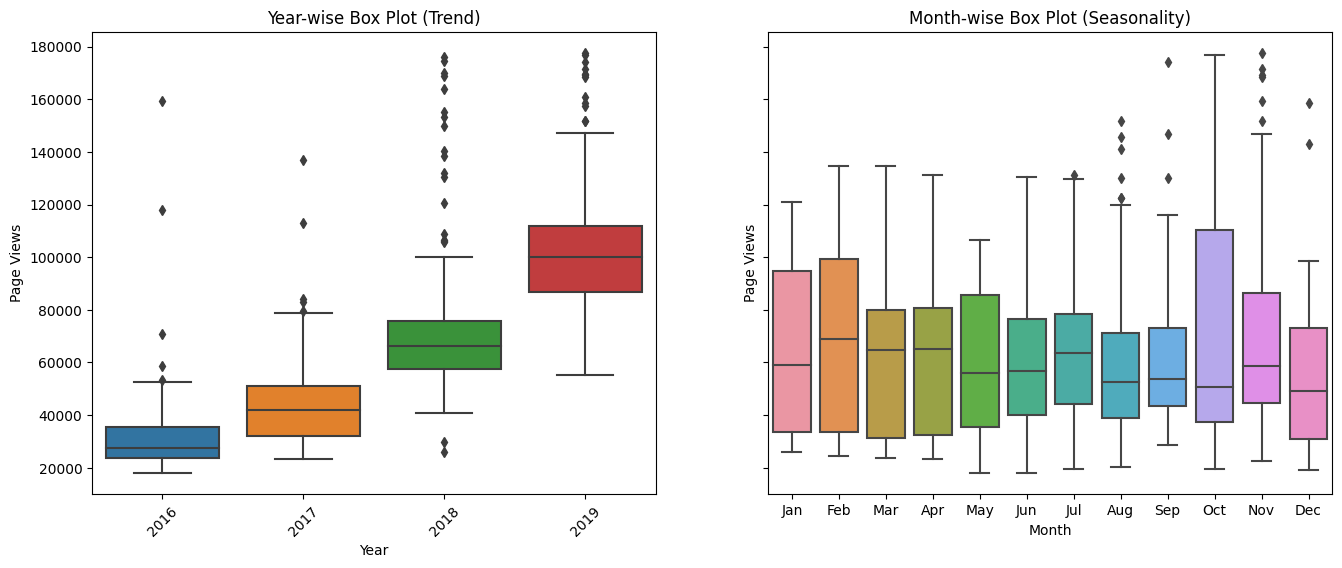

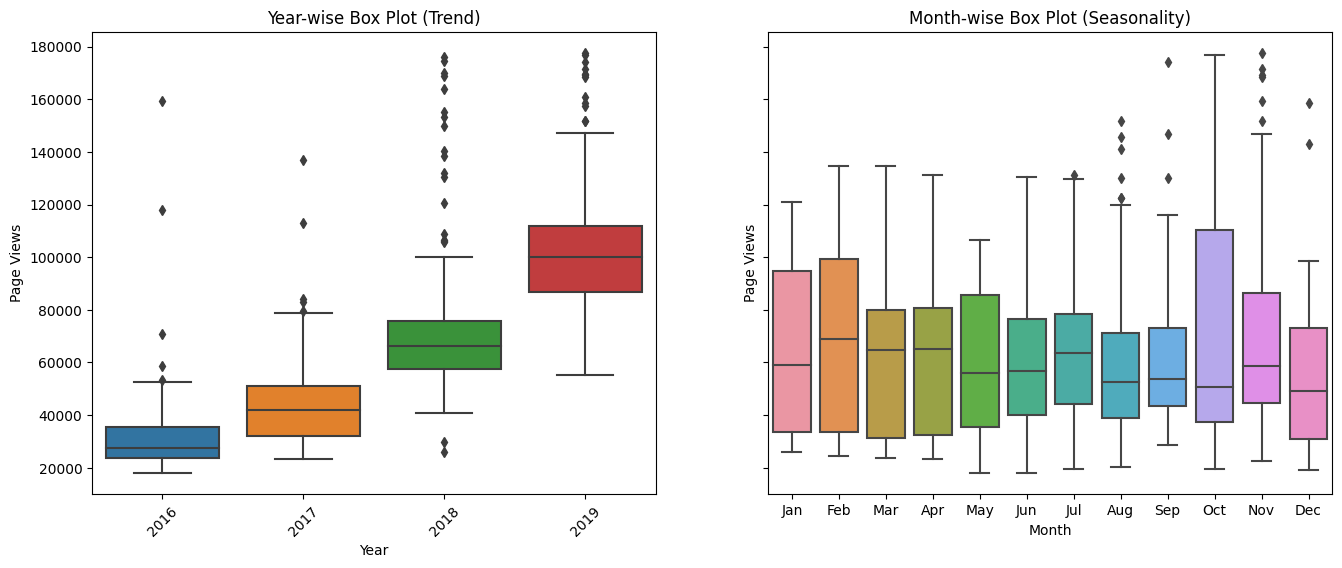

In [5]:
def draw_box_plot():
    # Prepare data for box plots
    df_box = df.copy()
    df_box.reset_index(inplace=True)
    df_box['year'] = df_box['date'].dt.year
    df_box['month'] = df_box['date'].dt.strftime('%b')

    # Set up the matplotlib figure
    fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

    # Draw Year-wise Box Plot (Trend)
    sns.boxplot(x='year', y='value', data=df_box, ax=axes[0])
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')
    axes[0].tick_params(axis='x', rotation=45)

    # Draw Month-wise Box Plot (Seasonality)
    sns.boxplot(x='month', y='value', data=df_box, ax=axes[1], 
                order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    # Save image and return fig (don't change this part)
    fig.savefig('box_plot.png')
    return fig

# Call the function to display the plot
draw_box_plot()

### Explanation:
- **Line Plot**: This section shows the overall trend of page views from May 2016 to December 2019.
- **Bar Plot**: This section visualizes the monthly average page views for each year, helping identify patterns over the years.
- **Box Plots**: The box plots show the distribution of page views across years and months, highlighting any seasonal patterns.